In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
hh = pd.read_stata('/Users/laurahughes/GitHub/Ethiopia/Data/ETH_201507_LSMS_All.dta')

0    Tigray
1    Tigray
2    Tigray
3    Tigray
4    Tigray
Name: sa1q01, dtype: category
Categories (11, object): [Afar < Amhara < Benshagul Gumuz < Somalie ... Harari < Diredwa < Oromia < Addis Ababa]


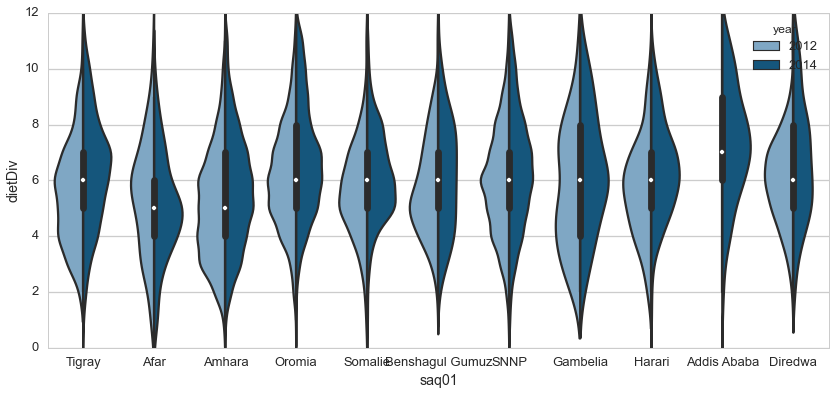

In [263]:
print(hh['sa1q01'].head())


col12 = '#74a9cf'
col14 = '#045a8d'

sns.set_style('whitegrid')
plt.figure(figsize=(14, 6))
plt.ylim([0,12])
sns.violinplot(x="saq01", y="dietDiv", hue="year", 
               data=hh, split=True, palette=[col12, col14])
#sns.stripplot(x="saq01", y="dietDiv", data=hh, jitter= 0.2, size=4);

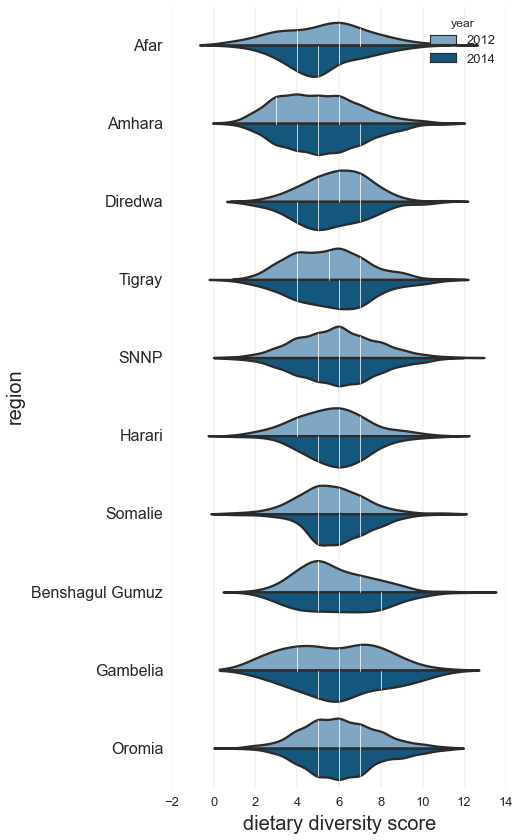

In [264]:
# DD03

hh_panel = hh[hh.ptrack == 'Both waves']

orderDD = hh_panel[hh_panel['year'] == 2014].groupby(['year', 'sa1q01'])['dietDiv'].mean().order()

#print(orderDD)

sns.set_context("talk")
sns.set_style('whitegrid')
plt.figure(figsize=(6, 14))
plt.ylim([0,12])
plt.grid(linewidth = 0.4)
plt.ylabel('ylabel', fontsize = 20)
plt.xlabel('xlabel', fontsize = 20)
plt.tick_params(axis='y', labelsize=16)
sns.despine(bottom = True, left = True)
ddViolin = sns.violinplot(y="saq01", x="dietDiv", hue="year", 
               order = ['Afar','Amhara','Diredwa','Tigray',"SNNP",'Harari',
                        'Somalie',  "Benshagul Gumuz", 'Gambelia','Oromia'],
               data=hh_panel, split=True, palette=[col12, col14], 
                          opacity = 0.5, inner = 'quartile')

for child in ddViolin.get_children():
    if isinstance(child, plt.Line2D):
        child.set_linewidth(0.75)
        child.set_linestyle('-')
        child.set_color('#ffffff')
        
plt.xlabel('dietary diversity score')
plt.ylabel('region');

plt.savefig('DD03_dietDiv_regions.pdf')

#sns.stripplot(x="saq01", y="dietDiv", data=hh_panel, jitter= True, size=4);

Axes(0.125,0.125;0.775x0.775)


                 dietary diversity  dietary diversity
regionName                                           
Oromia                    6.234437           6.234437
Gambella                  6.208696           6.208696
Benshagul Gumuz           6.152000           6.152000
Somalie                   6.024490           6.024490
Harari                    6.000000           6.000000


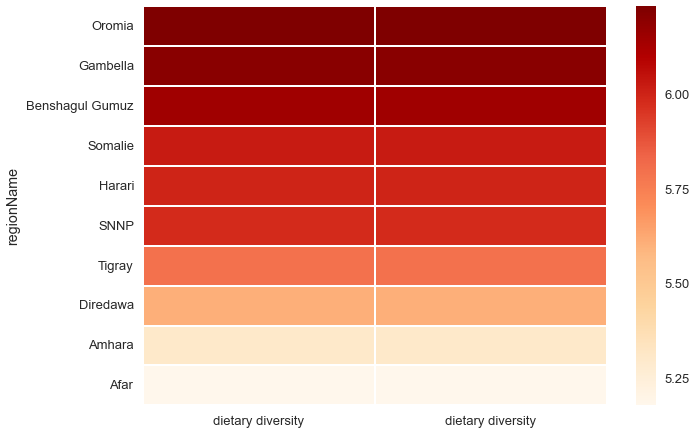

In [230]:
dd = pd.read_csv('dd2014_heat.csv', index_col = 1)


del dd['Unnamed: 0']
del dd['dd']

dietaryDiv = dd[['dietary diversity','dietary diversity']]

del dd['dietary diversity']


print(dietaryDiv.head())


sns.heatmap(dietaryDiv, linewidths=.5, cmap = 'OrRd')

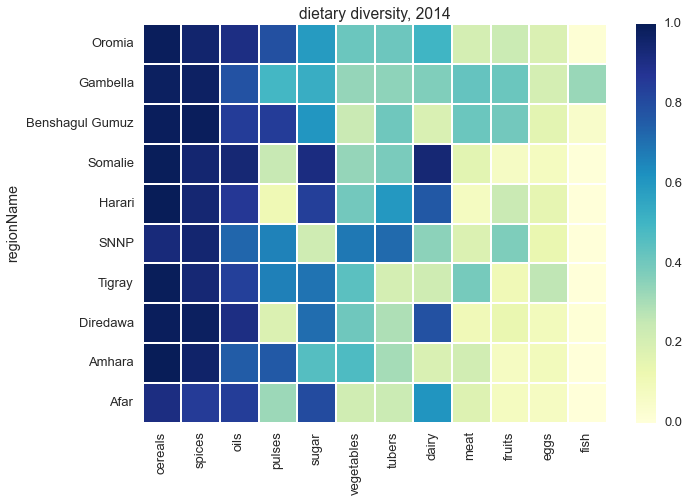

In [234]:
sns.heatmap(dd, linewidths=.5, cmap = 'YlGnBu')
plt.title('dietary diversity, 2014')

                  starches      oils     pulses     sugar  vegetables  \
regionName                                                              
Oromia           13.162483  2.955746  12.812417  1.683620    1.900925   
Gambella         13.182609  2.547826   6.730435  1.230435    1.173913   
Benshagul Gumuz  13.616000  2.884000  13.272000  1.676000    0.872000   
Somalie          12.457143  3.059184   2.853061  3.100000    1.714286   
Harari           14.000000  2.854167   1.650000  2.666667    2.250000   

                     dairy      meat    fruits  
regionName                                      
Oromia           10.953765  3.085865  0.643329  
Gambella          7.721739  9.391304  1.382609  
Benshagul Gumuz   2.976000  4.384000  1.224000  
Somalie          25.110204  2.416327  0.191837  
Harari           19.500000  2.133333  0.975000  


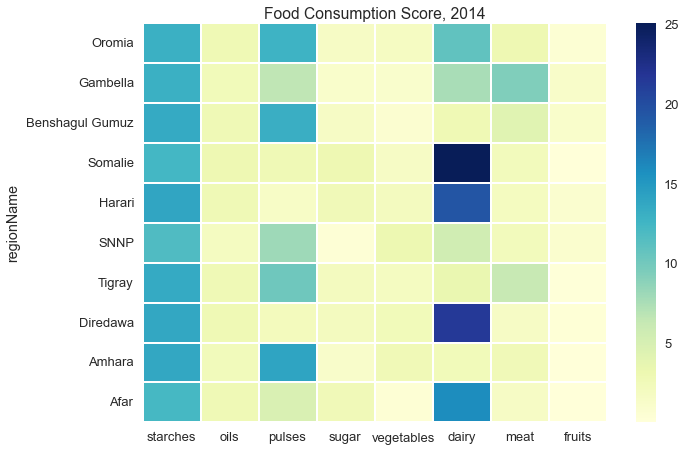

In [238]:
fcs = pd.read_csv('fcs2014_heat.csv', index_col = 1)


del fcs['Unnamed: 0']
del fcs['dietary diversity']

fcsScore = fcs.pop('fcs')


print(fcs.head())


sns.heatmap(fcs, linewidths=.5, cmap = 'YlGnBu')
plt.title("Food Consumption Score, 2014")

                  cereals    spices      oils    pulses     sugar  vegetables  \
regionName                                                                      
Oromia           0.015385  0.003550  0.092911  0.150388  0.075387   -0.064551   
Gambella         0.008562  0.022377 -0.032010 -0.146562  0.012691   -0.141537   
Benshagul Gumuz  0.017953  0.040464  0.033381  0.205786  0.090256   -0.240667   
Somalie          0.021872 -0.004597  0.124157 -0.393234  0.396542   -0.141892   
Harari           0.025953 -0.009869  0.052048 -0.525547  0.323923   -0.080667   

                   tubers     dairy      meat    fruits      eggs      fish  
regionName                                                                   
Oromia          -0.031435  0.099171 -0.016652  0.019564  0.042717 -0.001097  
Gambella        -0.094441 -0.030218  0.200716  0.200495  0.062509  0.313486  
Benshagul Gumuz -0.034267 -0.212131  0.190629  0.183104  0.013814  0.031051  
Somalie         -0.058593  0.534644 -0.062

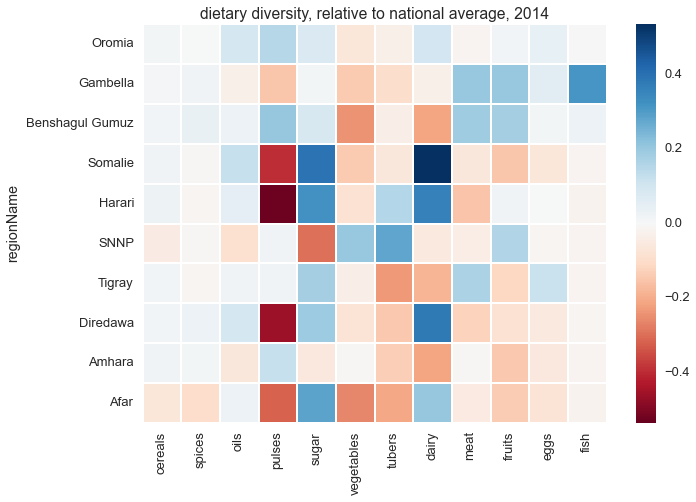

In [242]:
# Differential heatmaps (relative to the mean for the country)

rel_dd = pd.read_csv('rel_DD2014_heat.csv', index_col = 1)


del rel_dd['Unnamed: 0']
del rel_dd['dd']

del rel_dd['dietary diversity']


print(rel_dd.head())


sns.heatmap(rel_dd, linewidths=.5, cmap = 'RdBu')
plt.title('dietary diversity, relative to national average, 2014')

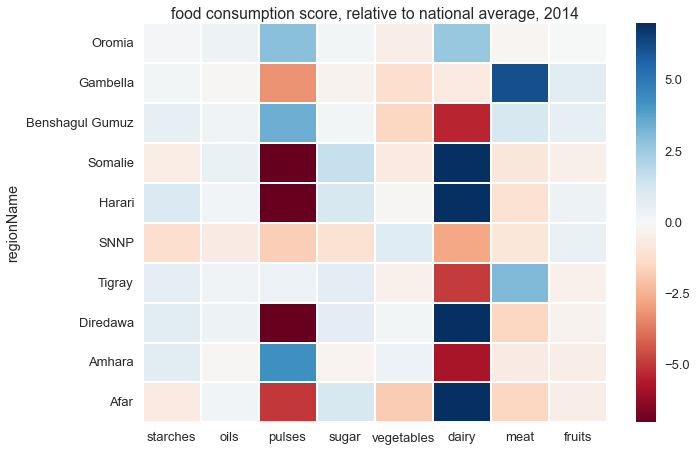

In [248]:
# Differential heatmaps (relative to the mean for the country)

rel_fcs = pd.read_csv('rel_fcs2014_heat.csv', index_col = 1)


del rel_fcs['Unnamed: 0']
del rel_fcs['fcs']

del rel_fcs['dietary diversity']


#print(rel_fcs.head())


sns.heatmap(rel_fcs, linewidths=.5, cmap = 'RdBu', vmin = -7, vmax = 7)
plt.title('food consumption score, relative to national average, 2014')

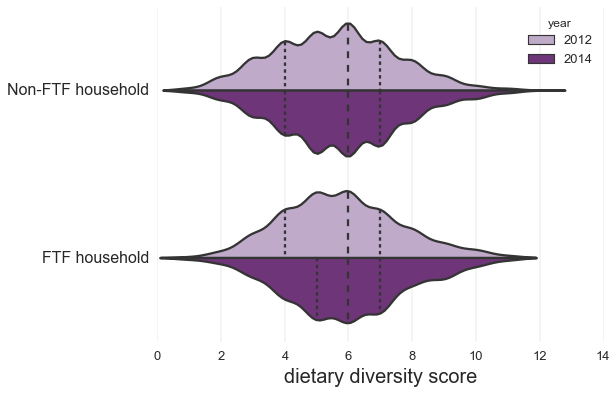

In [260]:
col14 = '#762a83'
col12 = '#c2a5cf'

sns.set_context("talk")
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
plt.ylim([0,12])
plt.grid(linewidth = 0.4)
plt.ylabel('ylabel', fontsize = 20)
plt.xlabel('xlabel', fontsize = 20)
plt.tick_params(axis='y', labelsize=16)
sns.despine(bottom = True, left = True)
ddViolin = sns.violinplot(y="ftfzone", x="dietDiv", hue="year", 
               data=hh_panel, split=True, palette=[col12, col14], 
                          opacity = 0.5, inner = 'quartile')
        
plt.xlabel('dietary diversity score')
plt.ylabel('');